In [7]:
# We work with dataset we cleaned up in the last exercise. 
import pandas as pd
import numpy as np
df = pd.read_csv('auto.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
# let us use linear regression model to see how different factors effect price
# First we import linear regression model from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [9]:
# X is the predictor variable and Y is the response variable
# Linear function: Yhat = a + bX
# This is a simple line formula where a is intercept and b is slope
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
# Now we can output a prediction
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
#to find out the slope and intercept
lm.intercept_

38423.305858157386

In [11]:
# slope is x coefficient
lm.coef_

array([-821.73337832])

In [12]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)
lm1

LinearRegression()

In [13]:
lm1.intercept_

-7963.338906281049

In [14]:
lm1.coef_

array([166.86001569])

In [15]:
# let's look at multiple linear regression
# Yhat = a + b1x + b2x + b3x
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
lm.intercept_

-15806.624626329198

In [16]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [17]:
# This means that Price = 53.5*horsepower + 4.7*curb-weight + 81.53*engine-size + 36.06*highway-mpg + (-15806.6)

#Let's look at some other factors
lm2 = LinearRegression()
Z1 = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z1, df['price'])
lm2.intercept_

38201.31327245728

In [18]:
lm2.coef_

array([   1.49789586, -820.45434016])

(0.0, 48170.87839753319)

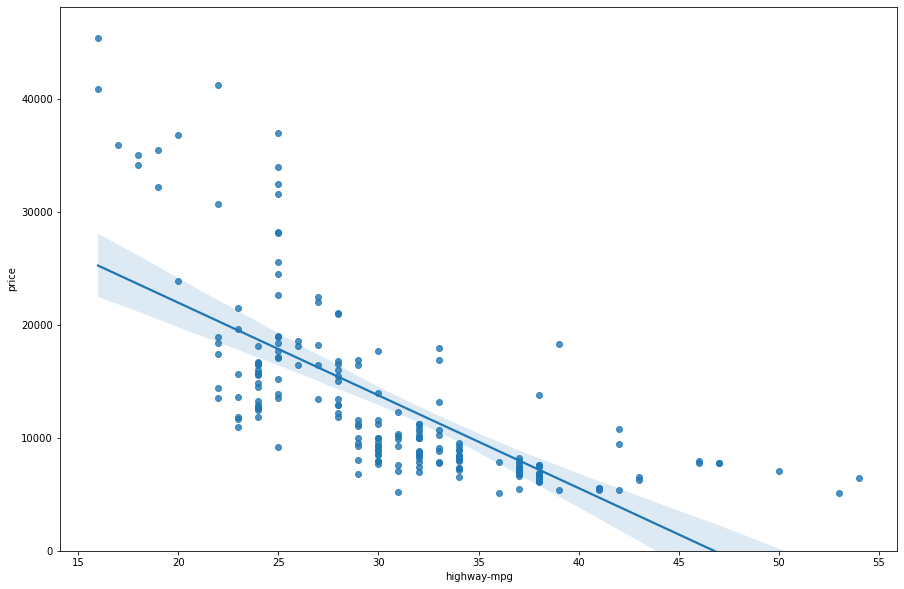

In [19]:
#Model evaluation using visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Let us visualize highway-pg as a potential predictor variable of price
width = 15
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

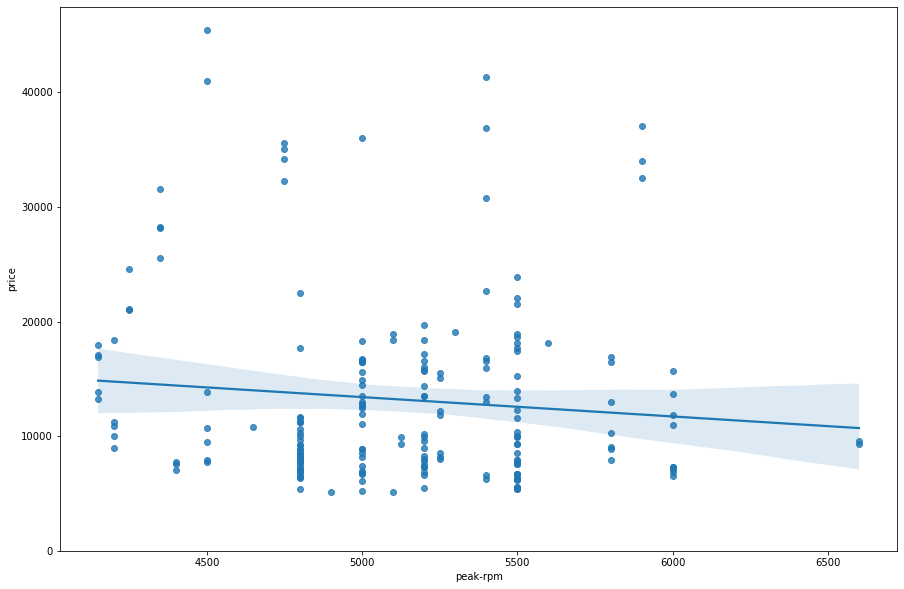

In [20]:
# we can see some correlation. Not a lot of scatter points are not close to the line. 
# Now peak-rpm as preditor variable for price 
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [21]:
# Does not look like a very strong correlation
# We can confirm this by looking at correlation
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


C:\Users\shahr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


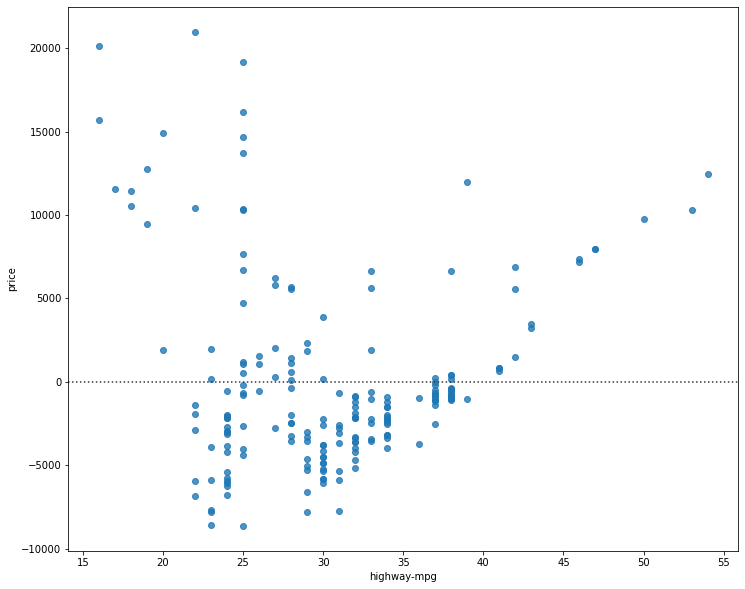

In [22]:
# a residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on x-axis
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

C:\Users\shahr\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shahr\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


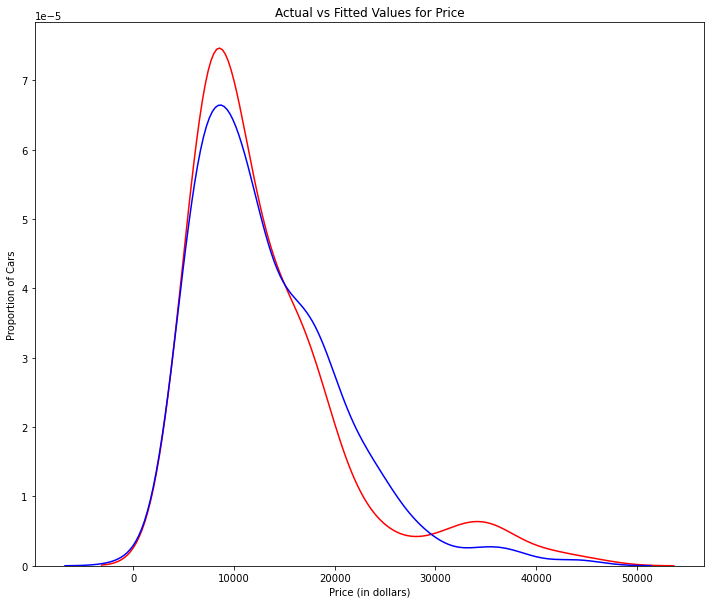

In [23]:
# Multiple Linear Regression
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [24]:
# Polynomial Regression
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [25]:
x = df['highway-mpg']
y = df['price']
# we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


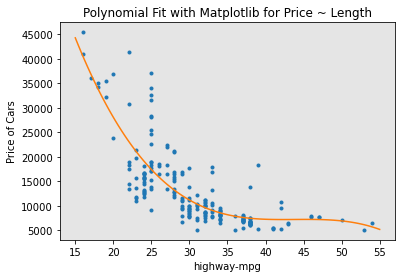

In [26]:
PlotPolly(p, x, y, 'highway-mpg')

In [27]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


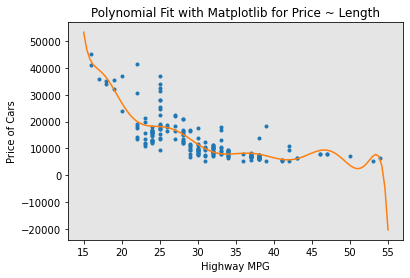

In [28]:
#Now let's try an 11th order polynomial
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [32]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

In [33]:
Z.shape

(201, 4)

In [34]:
Z_pr.shape
# Remember that Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# 2nd order polynomial function with 4 variables will look like: 
# Yhat = a + b1x1 + b2x2 + b3x3 + b4x4 + b5x1^2 + b6x2^2 + b7x3^2 + b8x4^2 + b9x1x2 +
#          b10x1x3 + b11x1x4 + b12x2x3 + b13x2x4 + b14x3x4

(201, 15)

In [36]:
# Pipeline
# Data pipelines simplify the steps of processing the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [40]:
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

In [41]:
#pipeline that predicts data using linear regression
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [68]:
# we can see difference in values predicted using polynomial equation and linear regression

# Measures for in-sample evaluation
#R^2 - coeff of determination is the measure to indicate how close the data is to the regression line
#MSE - mean squared error is the percentage of variation of the response variable (y) that is explained by a linear model
X = df[['engine-size']]
Y = df[['price']]
lm.fit(X,Y)
print('R^2: ', lm.score(X,Y))

R^2:  0.7609686443622008


In [69]:
#We can say that ~76.09% of the variation in price is explained by this simple linear model
#try plugging in different variables to see how well they predict price

Yhat=lm.predict(X)
print('The output of the first ten predicted value is: ', Yhat[0:10])

The output of the first ten predicted value is:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]
 [14729.62322775]
 [14729.62322775]
 [14729.62322775]
 [13895.32314929]
 [10057.54278839]]


In [70]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('MSE: ', mse)

MSE:  15021126.02517414


In [71]:
#R^2 of multiple linear model
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('R^2: ', lm.score(Z, df['price']))

R^2:  0.8093562806577457


In [62]:
Y_predict_multifit = lm.predict(Z)
print('R^2 using multiple linear model is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

R^2 using multiple linear model is:  11980366.87072649


In [72]:
#R^2 for polynomial fit
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('R^2: ', r_squared)
#x = highway=mpg

R^2:  0.674194666390652


In [73]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [74]:
#Prediction

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [75]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\shahr\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

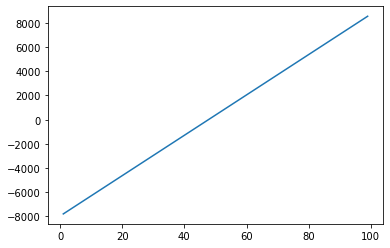

In [76]:
plt.plot(new_input, yhat)
plt.show()